In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("segments.png")

In [11]:
CANNY_THRESH_1 = 1
CANNY_THRESH_2 = 500
MASK_COLOR = (0.0,0.0,1.0) # In BGR format

size = (6, 6)
shape = cv2.MORPH_RECT
#kernel = cv2.getStructuringElement(shape, size)
kernel = np.ones((3, 3), np.uint8) 
kernel1 = np.ones((4, 4), np.uint8) 
kernel2 = np.ones((3, 3), np.uint8) 

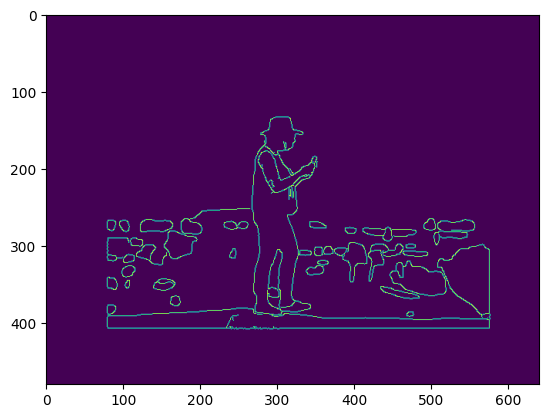

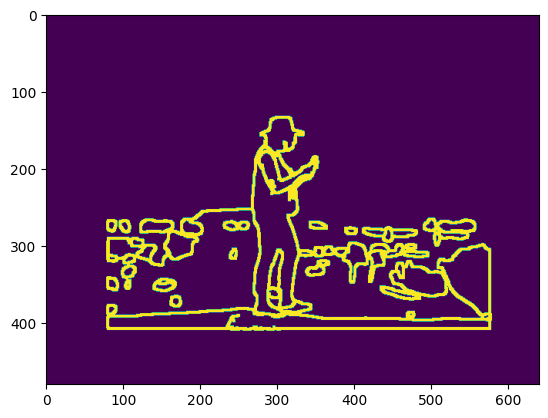

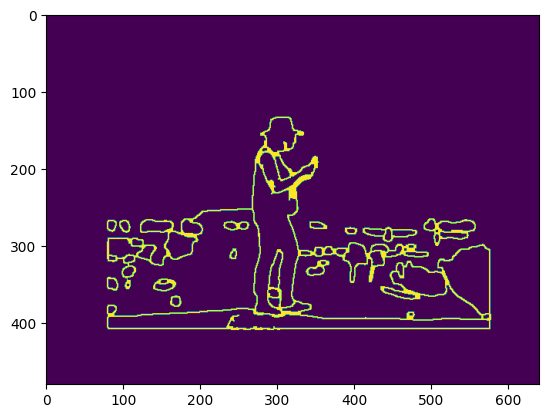

In [12]:
# Color Space Conversion Codes
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#-- Edge detection -------------------------------------------------------------------
# Edge Detection Algorithm
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
plt.imshow(edges)
plt.show()
# enlarges the area of the object, highlighting features (existing image is taken)
edges = cv2.dilate(edges, kernel1)
plt.imshow(edges)
plt.show()
# Erode the boundaries of the foreground object
# Used to diminish the characteristics of an image.
edges = cv2.erode(edges, kernel)

plt.imshow(edges)
plt.show()

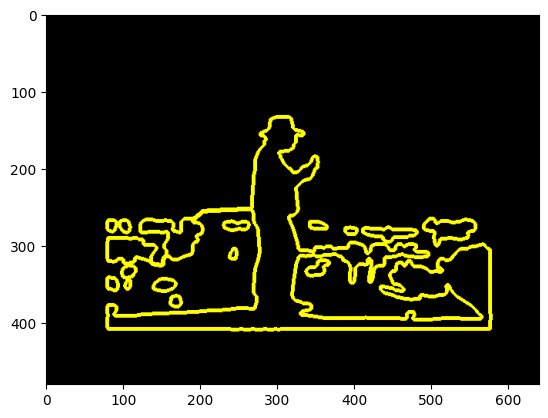

True

In [13]:
# Assignment of pixel values in relation to the provided threshold
_, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(
    edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

# show on screen (optional in jupiter)
%matplotlib inline
contours

drawing = np.zeros((gray.shape[0], gray.shape[1], 3), dtype=np.uint8)
CountersImg = cv2.drawContours(drawing, contours, -1, (255, 255, 0), 3)

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(CountersImg)
plt.show()

# save to disk
cv2.imwrite('picture.png', CountersImg)

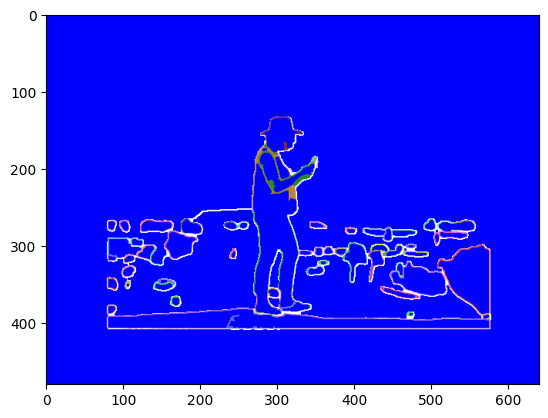

In [14]:
# Stack arrays in the depth sequence (along the third axis).
mask_stack = np.dstack([edges]*3)    # Create 3-channel alpha mask

#-- Blend masked img into MASK_COLOR background --------------------------------------
mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
img         = image.astype('float32') / 255.0                 #  for easy blending

masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 
     
plt.imshow(masked)
plt.show()# Display

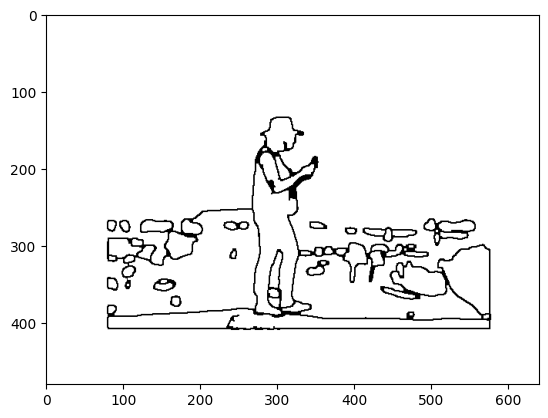

In [15]:
img = img.astype('float32') / 255.0  
# split image into channels
c_red, c_green, c_blue = cv2.split(img)

# merge with mask got on one of a previous steps
img_a = cv2.merge((c_red, c_green, c_blue, edges.astype('float32') / 255.0))
plt.imshow(img_a)
plt.show()